In [1]:
"""
This file will be used to run analysis on estimated density values.
There are both conditional and unconditional densities.
currently, there are 2 versions train_conditional and train_unconditional vs train_conditional_corrected and train_unconditional_corrected.
The "corrected" versions have the bug fix for the also taking the source log prob into account. in the non-corrected versions, only
the divergence is taken into account.
"""

'\nThis file will be used to run analysis on estimated density values.\nThere are both conditional and unconditional densities.\ncurrently, there are 2 versions train_conditional and train_unconditional vs train_conditional_corrected and train_unconditional_corrected.\nThe "corrected" versions have the bug fix for the also taking the source log prob into account. in the non-corrected versions, only\nthe divergence is taken into account.\n'

In [44]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [94]:
# load densities
# these contain only the integral part of conditional densities
# integral = "/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/clean/val_density_old_debug/val_density_old_remember_debug/token_count"
# integral_source = "/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/clean/val_density_old_debug/val_density_old_remember/token_count"
with open("/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/clean/val_density_reconst_256/token_count/1_0000_0200.json", 'r') as f:
    densities_1 = json.load(f)

with open("/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/clean/val_density_reconst_256/token_count/2_0000_0200.json", 'r') as f:
    densities_2 = json.load(f)

with open("/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/clean/val_density_reconst_256/token_count/4_0000_0200.json", 'r') as f:
    densities_4 = json.load(f)

with open("/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/clean/val_density_reconst_256/token_count/8_0000_0200.json", 'r') as f:
    densities_8 = json.load(f)

with open("/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/clean/val_density_reconst_256/token_count/16_0000_0200.json", 'r') as f:
    densities_16 = json.load(f)

with open("/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/clean/val_density_reconst_256/token_count/32_0000_0200.json", 'r') as f:
    densities_32 = json.load(f)

with open("/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/clean/val_density_reconst_256/token_count/64_0000_0200.json", 'r') as f:
    densities_64 = json.load(f)

with open("/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/clean/val_density_reconst_256/token_count/128_0000_0200.json", 'r') as f:
    densities_128 = json.load(f)

with open("/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/clean/val_density_reconst_256/token_count/256_0000_0200.json", 'r') as f:
    densities_256 = json.load(f)

In [95]:
integral_1 = np.array(densities_1)[:,0]
integral_2 = np.array(densities_2)[:,0]
integral_4 = np.array(densities_4)[:,0]
integral_8 = np.array(densities_8)[:,0]
integral_16 = np.array(densities_16)[:,0]
integral_32 = np.array(densities_32)[:,0]
integral_64 = np.array(densities_64)[:,0]
integral_128 = np.array(densities_128)[:,0]
integral_256 = np.array(densities_256)[:,0]

source_1 = np.array(densities_1)[:,1]
source_2 = np.array(densities_2)[:,1]
source_4 = np.array(densities_4)[:,1]
source_8 = np.array(densities_8)[:,1]
source_16 = np.array(densities_16)[:,1]
source_32 = np.array(densities_32)[:,1]
source_64 = np.array(densities_64)[:,1] 
source_128 = np.array(densities_128)[:,1]
source_256 = np.array(densities_256)[:,1]

In [96]:
avg_integrals = [np.mean(integral_1), np.mean(integral_2), np.mean(integral_4), np.mean(integral_8), np.mean(integral_16), np.mean(integral_32), np.mean(integral_64), np.mean(integral_128), np.mean(integral_256)]
avg_sources = [np.mean(source_1), np.mean(source_2), np.mean(source_4), np.mean(source_8), np.mean(source_16), np.mean(source_32), np.mean(source_64), np.mean(source_128), np.mean(source_256)]
avg_densities = [np.mean(integral_1+source_1), np.mean(integral_2+source_2), np.mean(integral_4+source_4), np.mean(integral_8+source_8), np.mean(integral_16+source_16), np.mean(integral_32+source_32), np.mean(integral_64+source_64), np.mean(integral_128+source_128), np.mean(integral_256+source_256)]

In [51]:
avg_densities = [np.mean(densities_1), np.mean(densities_2), np.mean(densities_4), np.mean(densities_8), np.mean(densities_16), np.mean(densities_32), np.mean(densities_64), np.mean(densities_128), np.mean(densities_256)]


TypeError: list indices must be integers or slices, not tuple

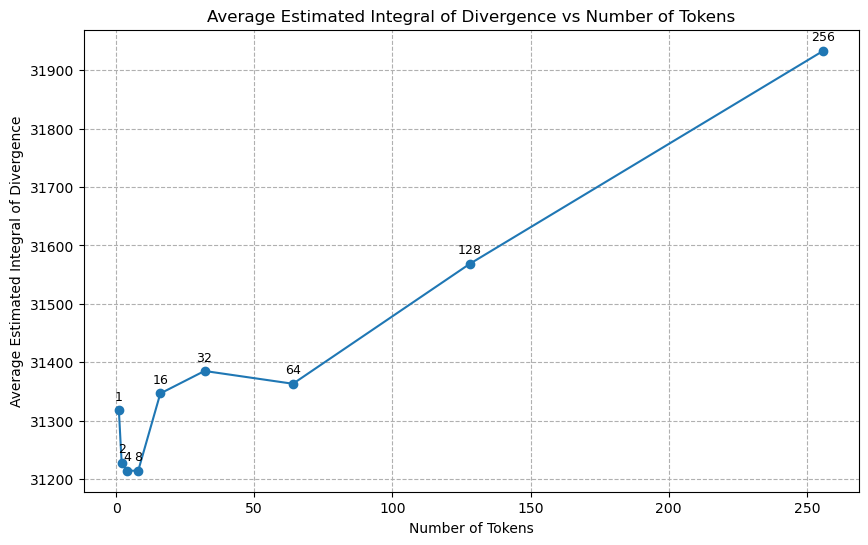

In [101]:
x_vals = [1, 2, 4, 8, 16, 32, 64, 128, 256]

plt.figure(figsize=(10,6))
plt.plot(x_vals, avg_integrals, marker='o')

# annotate each point with its x value
for x, y in zip(x_vals, avg_integrals):
    plt.text(x, y+12, str(x), fontsize=9, ha='center', va='bottom')

plt.xlabel('Number of Tokens')
plt.ylabel('Average Estimated Integral of Divergence')
plt.title('Average Estimated Integral of Divergence vs Number of Tokens')
plt.grid(True, which="both", ls="--")
plt.show()

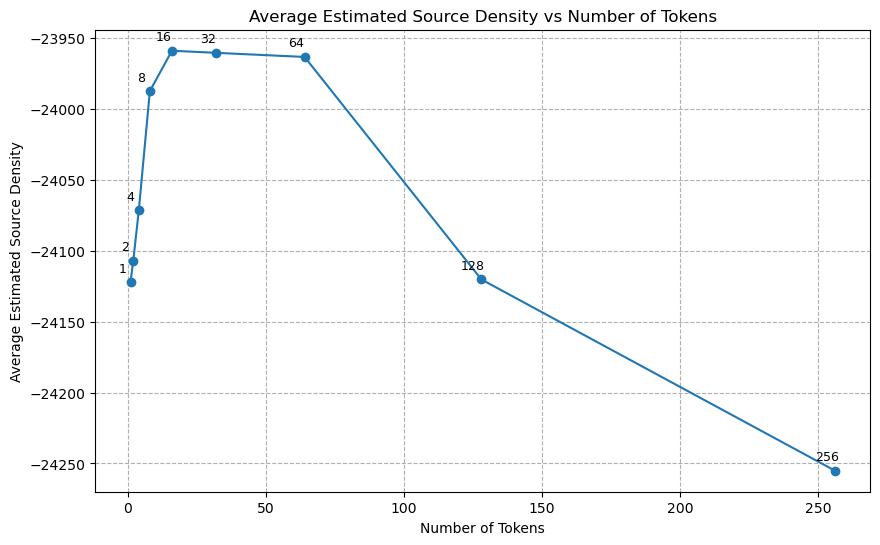

In [100]:
x_vals = [1, 2, 4, 8, 16, 32, 64, 128, 256]

plt.figure(figsize=(10,6))
plt.plot(x_vals, avg_sources, marker='o')

# annotate each point with its x value
for x, y in zip(x_vals, avg_sources):
    plt.text(x-3, y+5, str(x), fontsize=9, ha='center', va='bottom')

plt.xlabel('Number of Tokens')
plt.ylabel('Average Estimated Source Density')
plt.title('Average Estimated Source Density vs Number of Tokens')
plt.grid(True, which="both", ls="--")
plt.show()